In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # 
import numpy as np

In [8]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst

<xarray.DataArray 'sst' (time: 1828, lat: 90, lon: 180)>
[29613600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [14]:
u = xr.open_dataset("../DATA/ncep2_180x90/uwnd.10m.mon.mean.nc")['uwnd']
v = xr.open_dataset("../DATA/ncep2_180x90/vwnd.10m.mon.mean.nc")['vwnd']
um = u.mean("time").loc[10]
vm = v.mean("time").loc[10]
# # um = u.mean("time")
# # vm = v.mean("time")
# um.shape
# u.mean("time")
um

<xarray.DataArray 'uwnd' (lat: 90, lon: 180)>
array([[-4.2146583 , -3.9450772 , -3.6713536 , ..., -5.2372947 ,
        -4.990048  , -4.736379  ],
       [-5.351689  , -4.986481  , -4.617986  , ..., -6.4084682 ,
        -6.0641756 , -5.7113853 ],
       [-5.18348   , -4.7584224 , -4.335608  , ..., -6.439559  ,
        -6.0274515 , -5.607555  ],
       ...,
       [ 0.25619924,  0.1446847 ,  0.03810397, ...,  0.6129976 ,
         0.49100643,  0.3720474 ],
       [-0.27217695, -0.32768652, -0.3819324 , ..., -0.09745796,
        -0.15648085, -0.21474627],
       [-0.6243811 , -0.65188456, -0.6785759 , ..., -0.5065746 ,
        -0.5372077 , -0.56715435]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
    level    float32 10.0

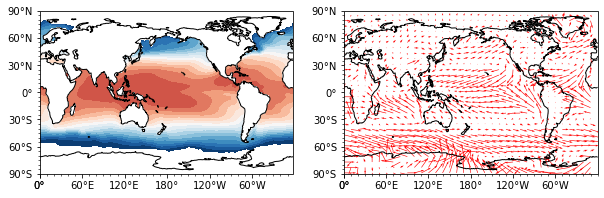

In [26]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=[10,3])
ax = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree(central_longitude=180))
x = sst.lon
y = sst.lat
sstm = sst.mean("time")
ax.contourf(x,y,sstm,transform=ccrs.PlateCarree(),levels=np.linspace(0,35,20),cmap="RdBu_r") # no cnetral lat
ax.coastlines()
ax.set_aspect("auto") # 回复原大小
xticks = np.arange(0,361,60)
yticks = np.arange(-90,91,30)
smallx = 10
smally = 5

# copy
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.xaxis.set_minor_locator(MultipleLocator(smallx))
ax.yaxis.set_minor_locator(MultipleLocator(smally))

ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree(central_longitude=180))
x1 = um.lon
y1 = um.lat
ax2.quiver(x1[::5],y1[::3],um[::3,::5].to_numpy(),vm[::3,::5].to_numpy(),color="red",scale=150,transform=ccrs.PlateCarree()) 
ax2.coastlines()
ax2.set_aspect("auto")
xticks = np.arange(0,361,60)
yticks = np.arange(-90,91,30)
smallx = 10
smally = 5

ax2.set_xticks(xticks, crs=ccrs.PlateCarree())
ax2.set_yticks(yticks, crs=ccrs.PlateCarree())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.xaxis.set_minor_locator(MultipleLocator(smallx))
ax2.yaxis.set_minor_locator(MultipleLocator(smally))

## 课后作业

绘制1990年到2019年DJF三个月的平均风场，并叠加同期的平均海温图。

通过自学流线图的画法，并且绘制JJA三个月的平均风场流线图。

In [23]:
um.to_numpy()

array([[-4.2146583 , -3.9450772 , -3.6713536 , ..., -5.2372947 ,
        -4.990048  , -4.736379  ],
       [-5.351689  , -4.986481  , -4.617986  , ..., -6.4084682 ,
        -6.0641756 , -5.7113853 ],
       [-5.18348   , -4.7584224 , -4.335608  , ..., -6.439559  ,
        -6.0274515 , -5.607555  ],
       ...,
       [ 0.25619924,  0.1446847 ,  0.03810397, ...,  0.6129976 ,
         0.49100643,  0.3720474 ],
       [-0.27217695, -0.32768652, -0.3819324 , ..., -0.09745796,
        -0.15648085, -0.21474627],
       [-0.6243811 , -0.65188456, -0.6785759 , ..., -0.5065746 ,
        -0.5372077 , -0.56715435]], dtype=float32)